## 1. Train a Logistic Regression model on the Iris dataset and evaluate it using accuracy and a confusion matrix.

In [11]:
import seaborn as sns
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression


In [103]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [25]:
X_test,X_train,y_test,y_train=train_test_split(x,y ,test_size=0.2,random_state=42)

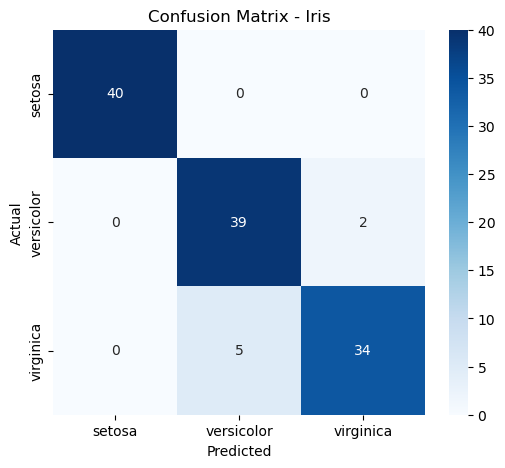

In [27]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris")

# ⬇️ Save the plot
plt.savefig("confusion_matrix.png")   # PNG download
# plt.savefig("confusion_matrix.pdf") # For PDF
# plt.savefig("confusion_matrix.jpg") # For JPG

plt.show()

## 2. Build a k-NN classifier on the Breast Cancer dataset and compare the accuracy for k = 3, 5, and 7.

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

In [31]:
data=load_breast_cancer()
x=data.data
y=data.target

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
K_values=[3,5,7]
accuracies={}

In [37]:
for k in K_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)

    y_pred=model.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)

    accuracies[k]=acc
    print(f"k = {k}, Accuracy = {acc:.4f}")

best_k = max(accuracies, key=accuracies.get)
print("\nBest k:", best_k, "with accuracy:", accuracies[best_k])

k = 3, Accuracy = 0.9298
k = 5, Accuracy = 0.9561
k = 7, Accuracy = 0.9561

Best k: 5 with accuracy: 0.956140350877193


## 3. Using a dataset of Study Hours vs Scores, fit a Linear Regression model and plot the regression line.

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier

data = {
    "Hours": [1.1, 2.5, 3.2, 4.5, 5.5, 6.1, 7.7, 8.8, 9.5],
    "Scores": [10, 21, 25, 42, 47, 52, 72, 88, 95]
}

df = pd.DataFrame(data)

In [40]:
X=df[['Hours']]
Y=df['Scores']

In [42]:
model=LinearRegression()
model.fit(X,Y)
y_pred=model.predict(X)
print(y_pred)
r2=r2_score(Y,y_pred)
r2

[ 5.80826254 20.15738797 27.33195069 40.6561386  50.90551391 57.0551391
 73.4541396  84.72845244 91.90301516]


0.9874934463554317

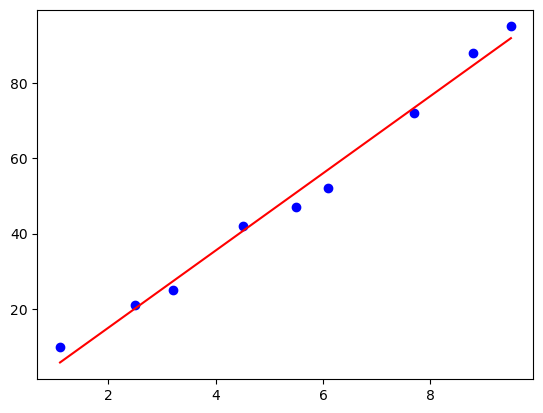

In [50]:
plt.scatter(X,Y,color="blue")
plt.plot(X,y_pred,color="red")

## 4. Train and visualize a Decision Tree classifier on the Iris dataset and identify the first splitting feature.

In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [85]:
data=datasets.load_iris()
x=data.data[:,[2]]
y=data.target

In [87]:
dt=DecisionTreeClassifier(criterion='entropy' ,max_depth=3)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [113]:
x_plot=np.linspace(0,6,100).reshape(-1,1)
x_de_prob=dt.predict_proba(x_plot)[:,1]

ft=RandomForestClassifier(n_estimators=5,max_depth=3,random_state=42)
ft.fit(x,y)
Y_rf_prob=ft.predict_proba(x_plot)[:,1]

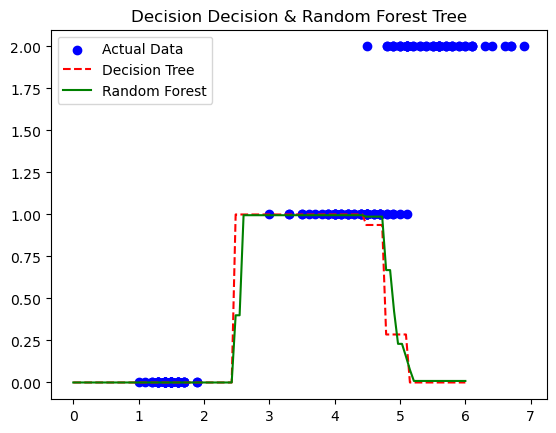

In [125]:
plt.scatter(x,y,color='blue',label="Actual Data")
plt.plot(x_plot,x_de_prob,color="red",linestyle='--',label="Decision Tree")
plt.plot(x_plot,Y_rf_prob,color="green",label="Random Forest")
plt.title("Decision Decision & Random Forest Tree")
plt.legend()
plt.show()

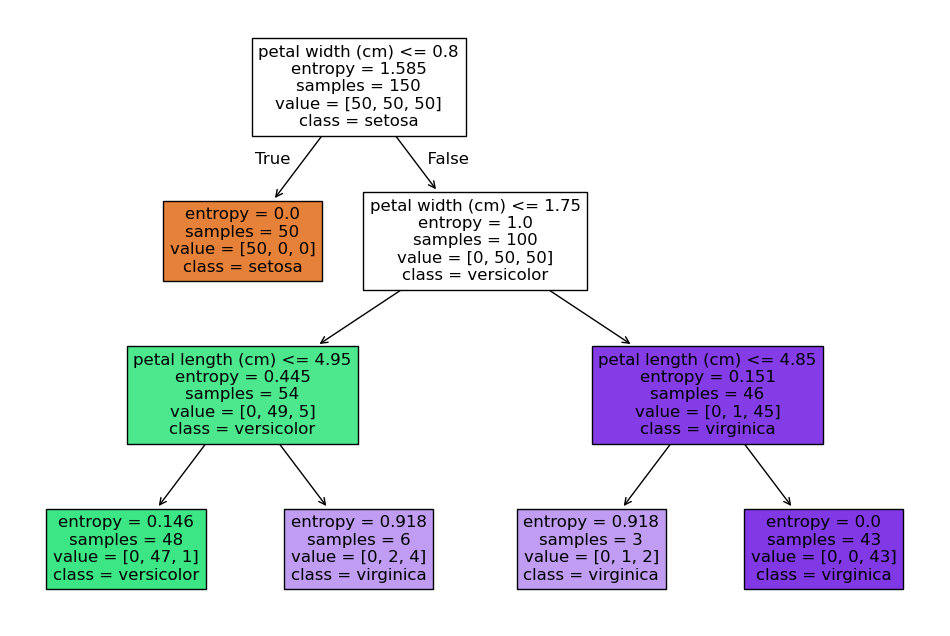

First splitting feature: petal width (cm)


In [135]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X, y)

# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
first_split_feature_index = dt.tree_.feature[0]
print("First splitting feature:", data.feature_names[first_split_feature_index])


## 5. Load the MNIST dataset, display sample images, train a simple ANN classifier, and report its accuracy.

In [140]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


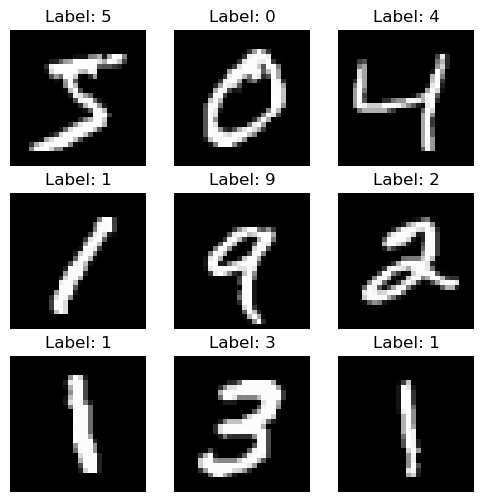

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [144]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\rupes\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [150]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9231 - loss: 0.2707 - val_accuracy: 0.9643 - val_loss: 0.1252
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9634 - loss: 0.1225 - val_accuracy: 0.9715 - val_loss: 0.0978
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9750 - val_loss: 0.0882
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0625 - val_accuracy: 0.9778 - val_loss: 0.0743
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0489 - val_accuracy: 0.9755 - val_loss: 0.0838


In [152]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0773
Test Accuracy: 0.977400004863739


## 6. Clean a dataset by handling missing values and removing duplicates, and show the dataset shape before and after cleaning.

In [183]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
df = sns.load_dataset("titanic")
df.isnull().sum()
df.shape
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [211]:
df['age'].fillna(df['age'].mean(),inplace=True)
print(df.isnull().sum())
data=df.drop("deck",axis=1)
data.shape

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\rupes\AppData\Local\Temp\ipykernel_16492\615805561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


(891, 14)

In [245]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

 ## 7. Apply k-Means clustering with k = 3 on a 2D dataset and visualize the clusters along with their centers

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [256]:
x=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18]])
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18]])

In [264]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)

C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [278]:
labels=kmeans.labels_
center=kmeans.cluster_centers_
print(labels)
print(center)

[2 2 0 0 0 0 1 1 1]
[[ 8.  9.]
 [15. 16.]
 [ 2.  3.]]


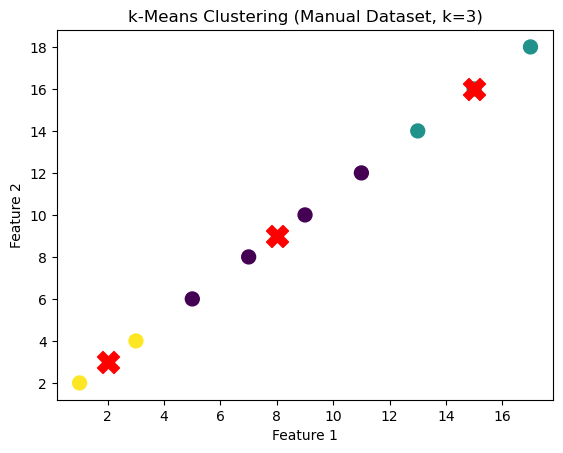

In [276]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(center[:, 0], center[:, 1], c='red', s=250, marker='X')
plt.title("k-Means Clustering (Manual Dataset, k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()`

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [306]:
x,y=make_blobs(n_samples=300,centers=3,random_state=42)
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
lables=kmeans.labels_
center=kmeans.cluster_centers_

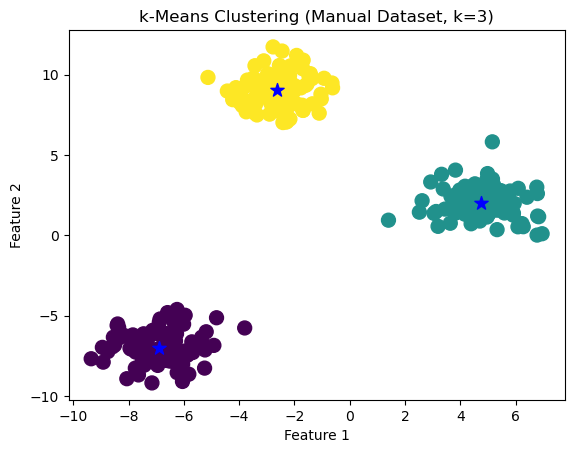

In [312]:
plt.scatter(x[:,0],x[:,1],c=lables,cmap='viridis',s=100)
plt.scatter(center[:,0],center[:,1],c="blue",s=100,marker="*")
plt.title("k-Means Clustering (Manual Dataset, k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 8. Split any dataset into train and test sets using different test sizes and compare the resulting model accuracies

In [331]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [327]:
data=datasets.load_iris()
x=data.data
y=data.target

In [348]:
test_sizes=[0.2,0.3,0.4]
for ts in test_sizes:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=ts,random_state=42)

    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Size = {ts}, Accuracy = {acc:.4f}")

Test Size = 0.2, Accuracy = 1.0000
Test Size = 0.3, Accuracy = 1.0000
Test Size = 0.4, Accuracy = 0.9833


## 9. Train a classifier and explain each component of its confusion matrix while manually calculating accuracy.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.datasets import make_classification


In [18]:
x,y=make_classification(
    n_samples=100,
    n_features=4,
    n_classes=2,
    random_state=42
)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN, FP, FN, TP = cm.ravel()

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Manual Accuracy:", accuracy)

TP: 12
TN: 8
FP: 0
FN: 0
Manual Accuracy: 1.0


## 10. Perform basic EDA on a dataset by creating a bar plot, histogram, and correlation heatmap, and summarize your insights.

In [21]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


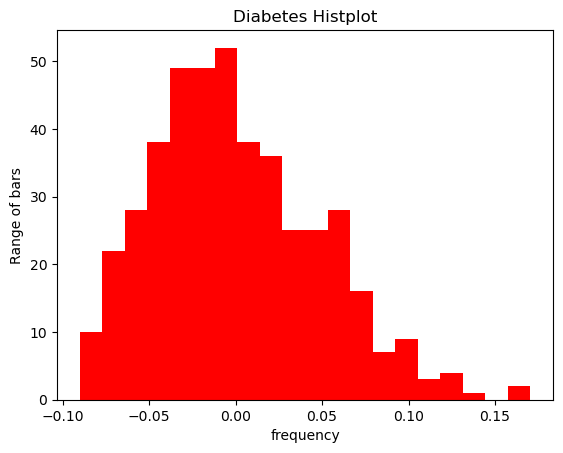

In [51]:
plt.hist(df['bmi'],color="red",bins=20)
plt.xlabel("frequency")
plt.ylabel("Range of bars")
plt.title("Diabetes Histplot")
plt.show()

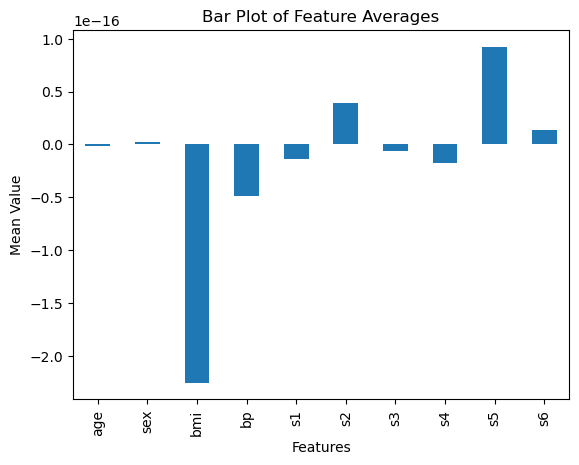

In [55]:
plt.figure()
df.mean().plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Bar Plot of Feature Averages")
plt.show()


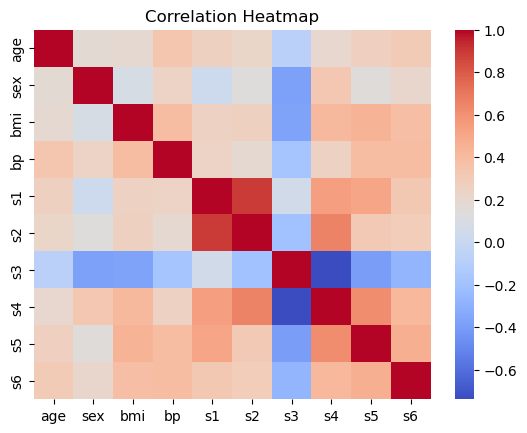

In [57]:
plt.figure()
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 11. Train both a Decision Tree and Random Forest on the same dataset and compare their accuracies and feature importances.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [101]:
data=datasets.load_iris()
x=data.data
y=data.target

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [121]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
acc_rd=accuracy_score(y_test,y_predict)

In [123]:
print("Decision Tree Accuracy:",acc)
print("Random Forest Accuracy:",acc_rd)

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


In [125]:
# Create comparison table
feature_importance = pd.DataFrame({
    "Feature": iris.feature_names,
    "Decision Tree": dt.feature_importances_,
    "Random Forest": rf.feature_importances_
})
print(feature_importance)


             Feature  Decision Tree  Random Forest
0  sepal length (cm)       0.016670       0.108098
1   sepal width (cm)       0.016670       0.030387
2  petal length (cm)       0.389265       0.439994
3   petal width (cm)       0.577395       0.421522


## 12. Process a small text paragraph by cleaning, tokenizing, counting word frequencies, and plotting the top 10 words.


data science is an interdisciplinary field that uses scientific methods
processes algorithms and systems to extract knowledge and insights from data
data science is widely used in machine learning and artificial intelligence

['data', 'science', 'is', 'an', 'interdisciplinary', 'field', 'that', 'uses', 'scientific', 'methods', 'processes', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'and', 'insights', 'from', 'data', 'data', 'science', 'is', 'widely', 'used', 'in', 'machine', 'learning', 'and', 'artificial', 'intelligence']
Counter({'data': 3, 'and': 3, 'science': 2, 'is': 2, 'an': 1, 'interdisciplinary': 1, 'field': 1, 'that': 1, 'uses': 1, 'scientific': 1, 'methods': 1, 'processes': 1, 'algorithms': 1, 'systems': 1, 'to': 1, 'extract': 1, 'knowledge': 1, 'insights': 1, 'from': 1, 'widely': 1, 'used': 1, 'in': 1, 'machine': 1, 'learning': 1, 'artificial': 1, 'intelligence': 1})
[('data', 3), ('and', 3), ('science', 2), ('is', 2), ('an', 1), ('interdisciplinary', 1),

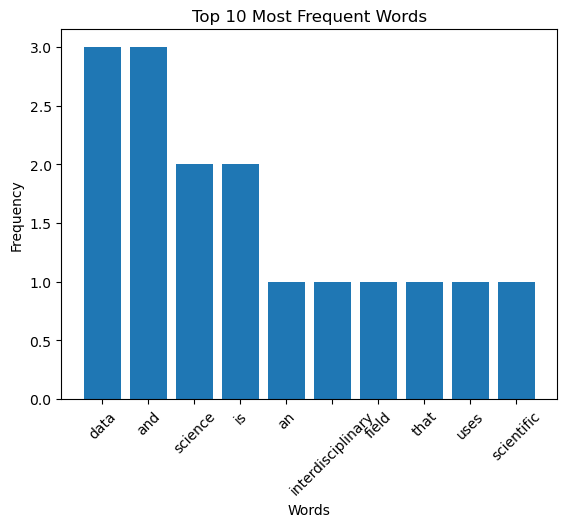

In [128]:
text = """
Data Science is an interdisciplinary field that uses scientific methods,
processes, algorithms and systems to extract knowledge and insights from data.
Data science is widely used in machine learning and artificial intelligence.
"""
import re

# Convert to lowercase
text = text.lower()

# Remove punctuation and special characters
text = re.sub(r'[^a-z\s]', '', text)

print(text)
tokens = text.split()
print(tokens)
from collections import Counter

word_freq = Counter(tokens)
print(word_freq)
top_words = word_freq.most_common(10)
print(top_words)
import matplotlib.pyplot as plt

words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure()
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()


## 13. Apply PCA to reduce a dataset to two components and visualize the resulting 2D scatter plot.

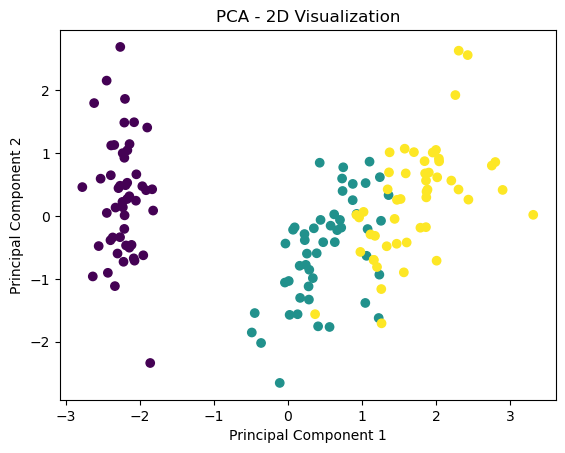

In [134]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
X_scaled = StandardScaler().fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization")
plt.show()


In [ ]:
“Data ko compress karna, lekin main information bachake.”

Covariance Matrix

Eigenvalues & Eigenvectors

Eigenvector → direction batata hai

Eigenvalue → us direction ki importance (variance) batata hai

## 14. Build a Logistic Regression model to predict student performance from hours studied and sleep hours and visualize the decision boundary.

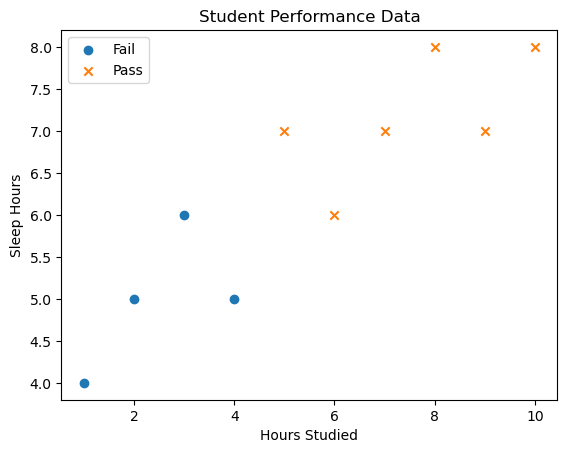

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample dataset
hours_studied = np.array([1,2,3,4,5,6,7,8,9,10])
sleep_hours   = np.array([4,5,6,5,7,6,7,8,7,8])

# Target: 1 = Pass, 0 = Fail
performance = np.array([0,0,0,0,1,1,1,1,1,1])

# Combine features
X = np.column_stack((hours_studied, sleep_hours))
y = performance
model = LogisticRegression()
model.fit(X, y)
plt.figure()

# Scatter plot
plt.scatter(hours_studied[y==0], sleep_hours[y==0], label="Fail", marker='o')
plt.scatter(hours_studied[y==1], sleep_hours[y==1], label="Pass", marker='x')

plt.xlabel("Hours Studied")
plt.ylabel("Sleep Hours")
plt.title("Student Performance Data")
plt.legend()


## 14. Build a Logistic Regression model to predict student performance from hours studied and sleep hours and visualize the decision boundary.

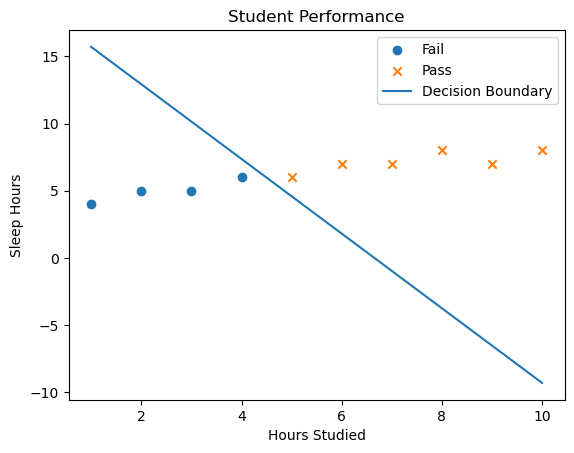

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Features
hours_studied = np.array([1,2,3,4,5,6,7,8,9,10])
sleep_hours   = np.array([4,5,5,6,6,7,7,8,7,8])

# Target (0 = Fail, 1 = Pass)
y = np.array([0,0,0,0,1,1,1,1,1,1])

# Combine features
X = np.column_stack((hours_studied, sleep_hours))
model = LogisticRegression()
model.fit(X, y)
plt.figure()

# Plot Fail and Pass points
plt.scatter(hours_studied[y==0], sleep_hours[y==0],
            marker='o', label="Fail")
plt.scatter(hours_studied[y==1], sleep_hours[y==1],
            marker='x', label="Pass")

plt.xlabel("Hours Studied")
plt.ylabel("Sleep Hours")
plt.title("Student Performance")
# Decision boundary equation
x_vals = np.linspace(1, 10, 100)
y_vals = -(model.coef_[0][0]*x_vals + model.intercept_[0]) / model.coef_[0][1]

plt.plot(x_vals, y_vals, label="Decision Boundary")
plt.legend()
plt.show()


## 15. Train a simple CNN on the CIFAR-10 dataset to classify images into 10 categories and report the training and test accuracy.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


In [ ]:
## 